In [186]:
import pandas as pd
df = pd.read_csv(r"titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
#DATA CLEANING
from sklearn.preprocessing import LabelEncoder
# Check for missing values
print(df.isnull().sum())

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Converting categorical columns to numeric
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_11508\3499619437.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_11508\3499619437.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [188]:

# Remove unnecessary columns
df1=df[['Survived', 'Pclass', 'Sex', 'Age','SibSp','Parch','Fare','Embarked']]
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [189]:
#Exploratory Data Analysis (EDA)

# Summary Statistics
print(df1.describe())

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    1.536476  
std     49.693429    0.791503  
min      0.000000    0.000000  
25%      7.910400    1.000000  
50%     14.454200    2.000000  
75%     31.000000    2.000000  
max    512.329

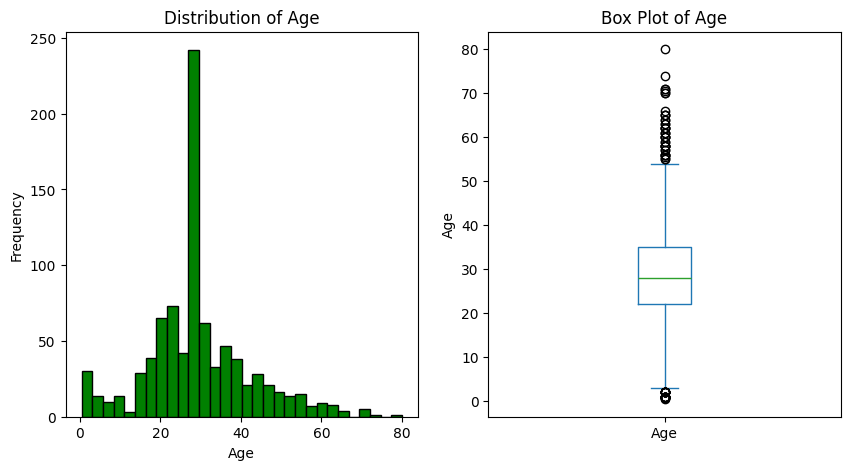

In [190]:
import matplotlib.pyplot as plt
# Distribution of Age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df1['Age'], bins=30,color=['green'], edgecolor='black',histtype='bar')
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

# Box Plot of Age
plt.subplot(1,2,2)
df1['Age'].plot(kind='box', title='Box Plot of Age')
plt.ylabel('Age')
plt.show()

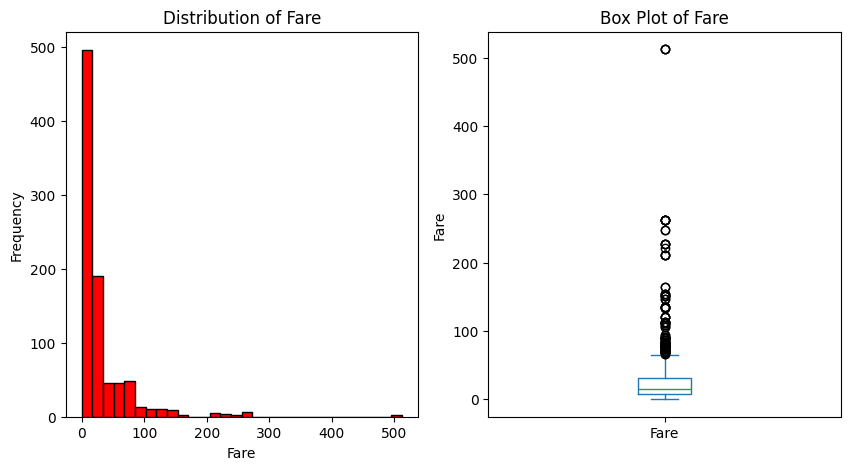

In [191]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

# Distribution of Fare
plt.hist(df1['Fare'], bins=30,color=['red'], edgecolor='black',histtype='bar')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Box Plot of Fare
plt.subplot(1,2,2)
df1['Fare'].plot(kind='box', title='Box Plot of Fare')
plt.ylabel('Fare')

plt.show()


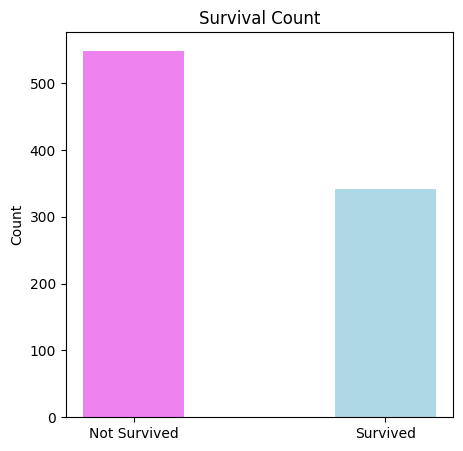

In [192]:
# Survival Count
plt.figure(figsize=(5,5))
df2 = df1['Survived'].value_counts()

plt.bar(df2.index,df2.values,color=['violet', 'lightblue'],width=0.4)
plt.title("Survival Count")
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
plt.show()

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age      -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex      -0.182333  0.108262  
Age       0.096688 -0.018754  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000  


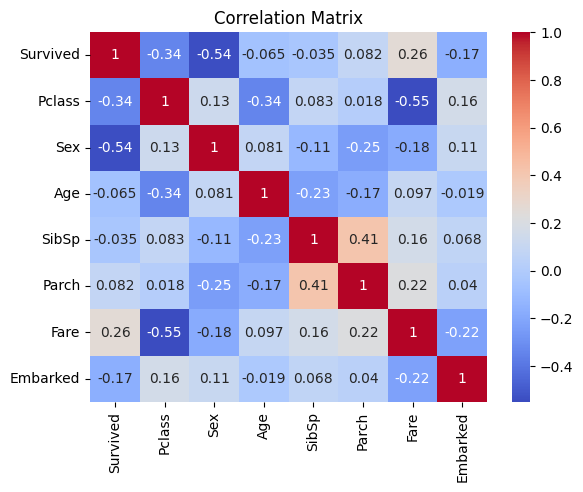

In [193]:
#Identifying Relationships
import seaborn as sns

# Correlation Matrix
correlation_matrix = df1.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

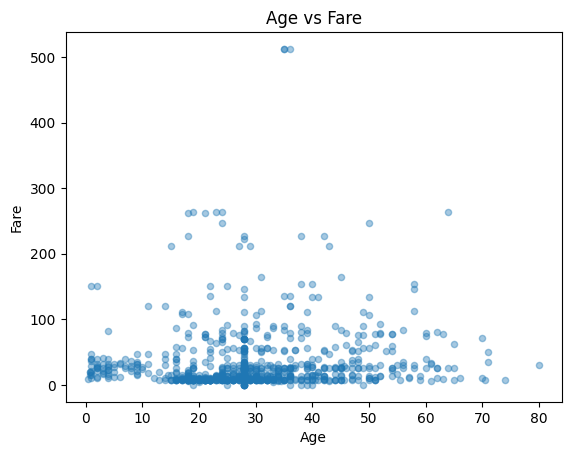

In [194]:
# Age vs Fare
df1.plot(kind='scatter', x='Age', y='Fare', alpha=0.4, title='Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

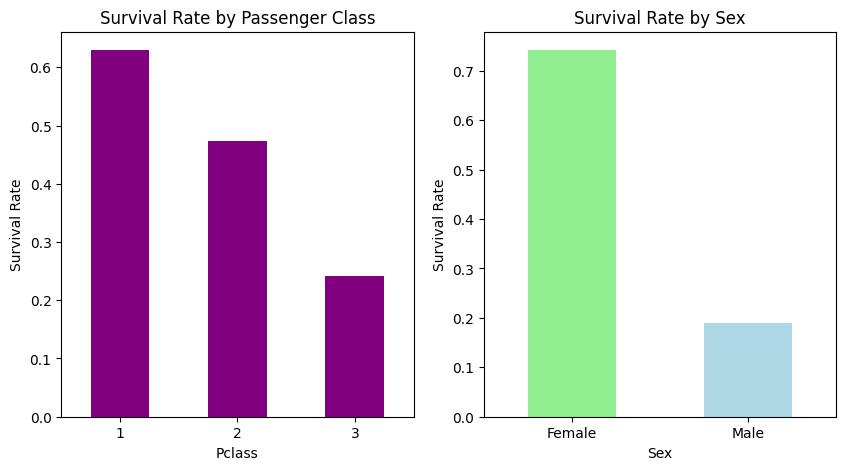

In [198]:
#Identifying Patterns and Trends

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

# Survival Rate by Pclass
df1.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='purple', title='Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
# Survival Rate by Sex
df1.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightgreen','lightblue'], title='Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks([1,0],['Male','Female'],rotation=0)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_11508\269874991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AgeGroup'] = pd.cut(df1['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
C:\Users\admin\AppData\Local\Temp\ipykernel_11508\269874991.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('AgeGroup')['Survived'].mean().plot(kind='line', marker='o', title='Survival Rate by Age Group')


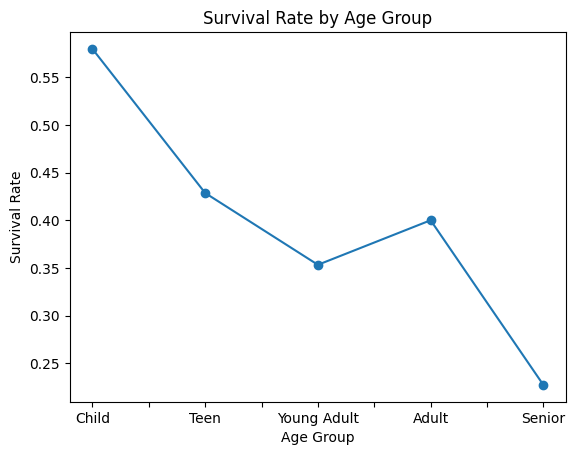

In [200]:
# Survival Rate by Age Group

df1['AgeGroup'] = pd.cut(df1['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df1.groupby('AgeGroup')['Survived'].mean().plot(kind='line', marker='o', title='Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


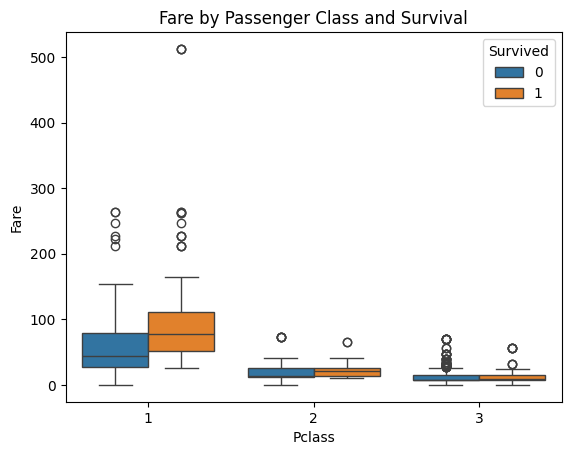

In [201]:
# Segmenting data by Pclass and analyzing patterns in Fare and Survived
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df1)
plt.title('Fare by Passenger Class and Survival')
plt.show()


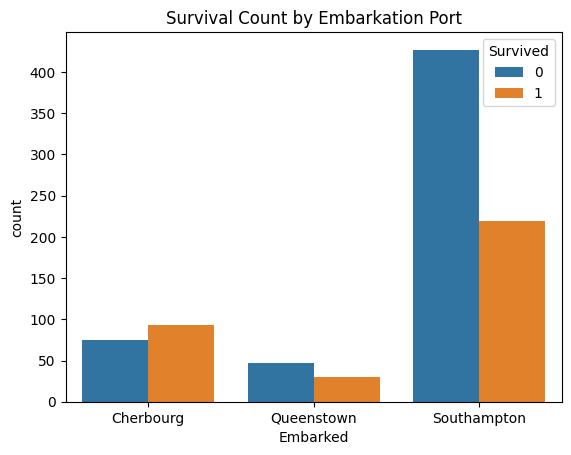

In [205]:
# Count plot for Embarked
sns.countplot(x='Embarked', hue='Survived', data=df1)
plt.title('Survival Count by Embarkation Port')
plt.xticks([0, 1, 2], ['Cherbourg','Queenstown','Southampton'])

plt.show()
